# Perceptron Algorithm
The Perceptron algorithm is a grouping algorithm in supervised machine learning that is useful when the data is linearly separable (meaning there is a clear divide between the categories of data) and the labels for the data are known. This notebook will be implementing the Perceptron algorithm in Julia using the Iris dataset.

In [4]:
using RDatasets
using Plots

In [5]:
# Import iris data and look at the structure
iris = dataset("datasets","iris")
head(iris)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


---
Looking at the dataset, there are 5 characteristics of the data that we can work with: **SepalLength, SepalWidth, PetalLength, PetalWidth,** and **Species.** Species is the type of iris that is being measured, and the other columns measure parts of the flowers in centimeters(cm).

In this exercise, Species is the label that we will be trying to predict using the numeric data in the other columns. First, we will attempt to use the Sepal data with the Perceptron algorithm to try and predict Species. Since the Perceptron algorithm is only useful when there are 2 options for the label, we will limit our data to the setosa and versicolor data for now.

---

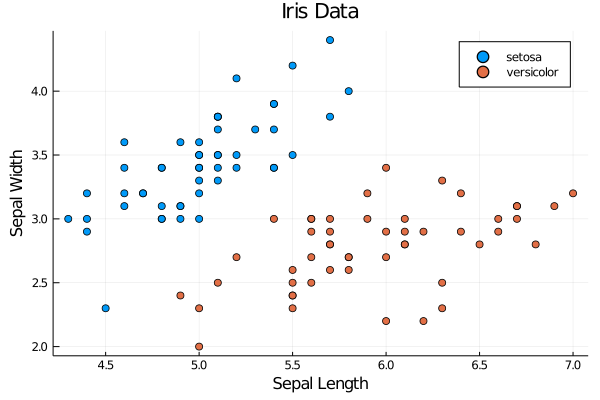

In [7]:
# Create array with Sepal data for setosa and versicolor data
x_data = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100])]

# Plot setosa sepal data
scatter(x_data[1:50],
        label = "setosa",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        title = "Iris Data")
# Add versicolor sepal data to the plot
scatter!(x_data[51:100],
        label = "versicolor")

Since the sepal data for these flower species is clearly linearly separable, we can proceed with coding the Perceptron algorithm for determing flower species based on sepal data. The first thing we need to do is to convert the label into a numeric form. We will do this by setting the "setosa" label to 1 and the "versicolor" label to  -1.

In [8]:
# Create array of numeric labls for species
# setosa = 1, versicolor = -1
y_data = [iris.Species[i] == "setosa" ? 1 : -1 for i=1:100]

# Sign function; add documentation
function sign(weights, x)

"""
Documentation   
"""
    x̂ = [x[1], x[2], 1]
    return weights'x̂ > 0 ? 1 : -1
end

sign (generic function with 1 method)

In [9]:
# Update rule for adjusting weights
function perceptron_update(weights, x, y)
    if sign(weights, x) != y
        weights += y*[x[1], x[2], 1.0]
    end
    return weights
end

perceptron_update (generic function with 1 method)

In [10]:
# Function to track number of misclassifications
function error_count(weights, feature_set, labels)
    return sum([sign(weights, feature_set[i]) != labels[i] ? 1 : 0 for i = 1:length(feature_set)])
end

error_count (generic function with 1 method)

In [11]:
function perceptron_algorithm(weights, feature_set, labels, ϵ)
    
    error_measures = []
    append!(error_measures, error_count(weights, feature_set, labels))
    
    weight_vector = []
    
    while error_count(weights, feature_set, labels) > ϵ
        for i = 1:length(feature_set)
            weights = perceptron_update(weights, feature_set[i],labels[i])
        end
        
        append!(weight_vector, weights)
        append!(error_measures, error_count(weights, feature_set, labels))
    end
    
    return weights, weight_vector, error_measures
end

perceptron_algorithm (generic function with 1 method)

In [12]:
w, W, errors = perceptron_algorithm(randn(3), x_data, y_data, 0)

([-77.9032969174516, 100.00014045725493, 120.66455129274617], Any[-5.903296917450284, -0.899859542743239, -2.3354487072538284, -7.803296917450284, -0.5998595427432392, -2.3354487072538284, -4.803296917450284, 2.7001404572567607, -1.3354487072538284, -6.7032969174502846  …  119.66455129274617, -81.50329691745159, 98.40014045725493, 119.66455129274617, -82.4032969174516, 97.70014045725493, 119.66455129274617, -77.9032969174516, 100.00014045725493, 120.66455129274617], Any[50, 50, 50, 50, 50, 50, 50, 50, 50, 50  …  4, 2, 1, 1, 1, 1, 1, 1, 1, 0])

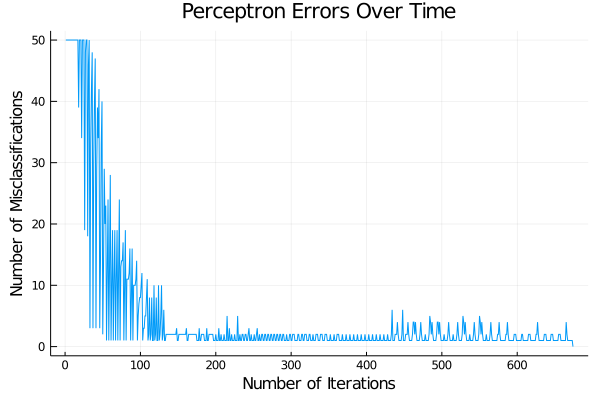

In [13]:
plot(errors,
    title = "Perceptron Errors Over Time",
    legend = false,
    xaxis = "Number of Iterations",
    yaxis = "Number of Misclassifications")

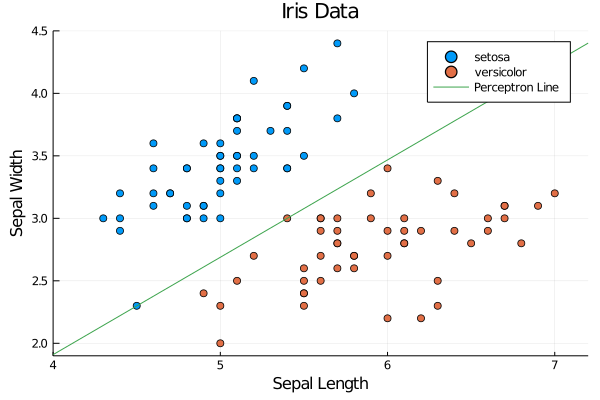

In [14]:
# Overlay the line created by the weights we have formed onto the plot of the iris data
scatter(x_data[1:50],
        label = "setosa",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        title = "Iris Data")
scatter!(x_data[51:100],
        label = "versicolor")

plot!(x -> (-x*w[1] - w[3])/w[2],
        xlim = (4,7.2),
        ylim = (1.9,4.5),
        label = "Perceptron Line")